In [63]:
import torch
import torch.nn as nn
import torch.nn.functional as F 

from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import numpy as np

In [69]:
# Converts the images from the dataset to pytorch tensors.
transform = transforms.ToTensor()

In [70]:
# Downloads CIFAR10 dataset and splits it into a training and testing datasets.
data_path = '../data_cifar/'
cifar10_train = datasets.CIFAR10(data_path, train=True, download=True, transform=transform)
cifar10_test = datasets.CIFAR10(data_path, train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [71]:
# Prints the size of the training and testing datasets.
print("Training: ", len(cifar10_train))
print("Testing: ", len(cifar10_test))

Training:  50000
Testing:  10000


In [72]:
#seed of random number generator set for reporducible results
torch.manual_seed(80)
# data loaded into batches for training and testing
train_loader = DataLoader(cifar10_train, batch_size=100, shuffle=True)
test_loader = DataLoader(cifar10_test, batch_size=500, shuffle=False)

In [73]:
# model class created
class NeuralNetwork(nn.Module):
  #initialization method set
    def __init__(self, input_size=32*32*3, output_size=10):
        super().__init__()
        # the three input layers created and input sizes defined
        self.fc1 = nn.Linear(input_size, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, output_size)

    def forward(self, X):
      # activation functions defined
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        # result passed through softax activation function
        return F.log_softmax(X, dim=1)

In [74]:
torch.manual_seed(80)

# variable model created 
model = NeuralNetwork()
model

NeuralNetwork(
  (fc1): Linear(in_features=3072, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [75]:
# criterion created and loss calculated
criterion = nn.CrossEntropyLoss()
# optimization algorithm - Stochastic Gradient Descent
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [76]:
for images, labels in train_loader:
  break

images.shape
images.view(-1, 3072).shape

torch.Size([100, 3072])

In [77]:
import time
# set start time to calculate elapsed time once training ends
start_time = time.time()

In [78]:
# number of epochs set
epochs = 50

# empty lists created
train_losses = []
test_losses = []
train_correct = []
test_correct  = []


In [79]:
#  for loop that will iterate in the range of epochs
for i in range(epochs):
   
    trn_corr = 0
    tst_corr = 0
    batch_corr = 0
    
# We create a for loop and use the enumerate() method to iterate over X_train and y_train
    for b_iter, (X_train, y_train) in enumerate(train_loader):
      
      # Make sure batch number starts at 1
      b_iter +=1

      # Predictions of the model
      y_pred = model(X_train.view(100, -1))
      
      # Loss calclulated
      loss = criterion(y_pred, y_train)
      
      # Extract maximal predicted values
      predicted = torch.max(y_pred.data, 1)[1]
      batch_corr = (predicted == y_train).sum()
      trn_corr += batch_corr
      
      # gradient equals to zero after each epoch
      optimizer.zero_grad()
      
      # Back propogation applied and parameter optimized
      loss.backward()
      optimizer.step()
      
      # every 100 iterations
      if b_iter % 100 == 0:
        
        # accuracy calculated
        accuracy = trn_corr.item()*100 / (100*b_iter)
        # print out during training
        print( f'epoch: {i} iterations {b_iter} loss:{loss.item()} accuracy:{accuracy} ')
    
    # update training loss and accuracy for each epoch and append to lists 
    train_losses.append(loss)
    train_correct.append(trn_corr)

    # Run the test data while training
    with torch.no_grad():
      
      for b_iter, (X_test, y_test) in enumerate(test_loader):
        
        y_val = model(X_test.view(500, -1))
        
        predicted = torch.max(y_val.data, 1)[1]
        tst_corr += (predicted == y_test).sum()
     
    loss = criterion(y_val,y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)

# calculate and print elapsed time
total_time = time.time() - start_time
print( f' Duration: {total_time/60} mins')

epoch: 0 iterations 100 loss:2.2795045375823975 accuracy:14.53 
epoch: 0 iterations 200 loss:2.2311697006225586 accuracy:15.815 
epoch: 0 iterations 300 loss:2.166266441345215 accuracy:17.386666666666667 
epoch: 0 iterations 400 loss:2.1228456497192383 accuracy:19.4475 
epoch: 0 iterations 500 loss:2.1755008697509766 accuracy:20.652 
epoch: 1 iterations 100 loss:1.9860860109329224 accuracy:27.7 
epoch: 1 iterations 200 loss:2.0195648670196533 accuracy:28.615 
epoch: 1 iterations 300 loss:1.9050506353378296 accuracy:29.44 
epoch: 1 iterations 400 loss:2.0092906951904297 accuracy:29.725 
epoch: 1 iterations 500 loss:2.0692601203918457 accuracy:30.122 
epoch: 2 iterations 100 loss:1.8944331407546997 accuracy:31.68 
epoch: 2 iterations 200 loss:1.8663487434387207 accuracy:32.455 
epoch: 2 iterations 300 loss:1.8614457845687866 accuracy:32.64 
epoch: 2 iterations 400 loss:1.779637336730957 accuracy:32.675 
epoch: 2 iterations 500 loss:1.9161075353622437 accuracy:32.93 
epoch: 3 iterations 1

In [80]:
# displays training accuracies
train_accuracy =[t/500 for t in train_correct ] 
train_accuracy

[tensor(20.6520),
 tensor(30.1220),
 tensor(32.9300),
 tensor(35.0960),
 tensor(36.5160),
 tensor(37.8540),
 tensor(39.1800),
 tensor(40.4040),
 tensor(41.0340),
 tensor(42.1320),
 tensor(42.8380),
 tensor(43.6980),
 tensor(44.4000),
 tensor(45.0760),
 tensor(45.4620),
 tensor(46.0760),
 tensor(46.6120),
 tensor(47.0600),
 tensor(47.4140),
 tensor(47.9640),
 tensor(48.1540),
 tensor(48.6380),
 tensor(49.0340),
 tensor(49.6600),
 tensor(49.8460),
 tensor(50.1380),
 tensor(50.5180),
 tensor(50.5800),
 tensor(51.1200),
 tensor(51.4700),
 tensor(51.5720),
 tensor(52.1240),
 tensor(52.2960),
 tensor(52.3400),
 tensor(52.7520),
 tensor(53.),
 tensor(53.3260),
 tensor(53.4820),
 tensor(54.),
 tensor(54.1780),
 tensor(54.1880),
 tensor(54.4760),
 tensor(54.7240),
 tensor(54.9240),
 tensor(55.2780),
 tensor(55.2600),
 tensor(55.5340),
 tensor(55.8820),
 tensor(56.0600),
 tensor(56.3180)]

In [81]:
# displays test accuracies
test_accuracy =[t/100 for t in test_correct ] 
test_accuracy

[tensor(28.9400),
 tensor(32.2000),
 tensor(33.1500),
 tensor(36.1500),
 tensor(37.6300),
 tensor(38.9300),
 tensor(39.8200),
 tensor(40.7800),
 tensor(41.3000),
 tensor(42.8100),
 tensor(43.6200),
 tensor(43.3900),
 tensor(43.3700),
 tensor(44.7500),
 tensor(45.3700),
 tensor(45.3000),
 tensor(46.2500),
 tensor(45.7800),
 tensor(46.8700),
 tensor(45.7400),
 tensor(46.8100),
 tensor(47.3600),
 tensor(48.3500),
 tensor(48.2100),
 tensor(47.5800),
 tensor(48.3400),
 tensor(49.3200),
 tensor(47.9200),
 tensor(49.0300),
 tensor(50.3800),
 tensor(49.6800),
 tensor(50.2500),
 tensor(49.0100),
 tensor(49.4500),
 tensor(50.3300),
 tensor(49.7000),
 tensor(50.5700),
 tensor(50.9700),
 tensor(50.5500),
 tensor(50.7200),
 tensor(50.4600),
 tensor(51.5400),
 tensor(50.5700),
 tensor(49.9400),
 tensor(49.8300),
 tensor(50.7700),
 tensor(51.3500),
 tensor(51.6100),
 tensor(51.8000),
 tensor(51.8700)]

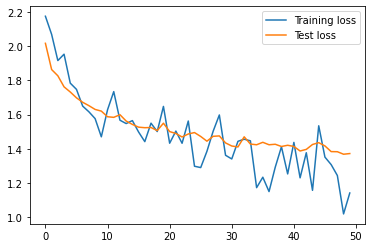

In [82]:
# training and test losses plot against epochs
plt.plot(train_losses, label= "Training loss")
plt.plot(test_losses, label= "Test loss")
plt.legend()

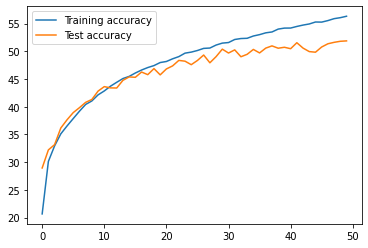

In [83]:
# training and test accuracies plot against epochs
plt.plot(train_accuracy, label= "Training accuracy")
plt.plot(test_accuracy, label= "Test accuracy")
plt.legend()

In [84]:
# test images loaded
test_load_all = DataLoader(cifar10_test, batch_size=10000, shuffle=False)

In [85]:
# Evaluate unseen images with model and print accuracy percentage
with torch.no_grad():
  correct = 0
  for X_test, y_test in test_load_all: 
    y_val = model(X_test.view(len(X_test),-1))
    predicted = torch.max(y_val,1)[1]
    correct += (predicted == y_test).sum()

100*correct.item()/len(cifar10_test)    

51.87